# Исследование объявлений о продаже квартир

**Описание проекта:**  
В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости, а также установить параметры, которые позволят построить автоматизированную систему для отслеживания аномалий и мошеннической деятельности на сервисе.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Цели исследования:**  
- Определить рыночную стоимость объектов недвижимости
- Установить параметры, которы позволят построить автоматизированную систему для отслеживания аномалий и мошеннической деятельности
- Установить, какие факторы вляют на ценообразование стоимости квартир

**Ход исследования:**  

Исследование будет состоять из семи этапов:
1. Обзор и ознакомление с данными
2. Предобработка данных
3. Расчеты дополнительных параметров и их добавление в основной датасет
4. Исследовательский анализ параметров объектов
5. Подведение итогов исследования

## Знакомство с данными

**1.1 Откроем файл с данными и сохраним его в переменную data:**

In [7]:
# импорт библиотек:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

# прочитаем csv-файл и сохраним данные в переменную data
data = pd.read_csv('C:\\Users\\Refresh\\Projects\\Flats\\real_estate_data.csv',  sep='\t')

**1.2 Выведем первые 5 строк датафрейма data на экран:**

In [8]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


**1.4 Выведем основную информацию о датафрейме с помощью метода info**():

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**Вывод:** Датафрейм data состоит из 23699 строк и 22 столбцов.  
В нем содержатся следующая информация об объектах:   
-	*airports_nearest* — расстояние до ближайшего аэропорта в метрах (м)  
-	*balcony* — число балконов  
-	*ceiling_height* — высота потолков (м)  
-	*cityCenters_nearest* — расстояние до центра города (м)  
-	*days_exposition* — сколько дней было размещено объявление (от публикации до снятия)  
-	*first_day_exposition* — дата публикации  
-	*floor* — этаж  
-	*floors_total* — всего этажей в доме  
-	*is_apartment* — апартаменты (булев тип)  
-	*kitchen_area* — площадь кухни в квадратных метрах (м²)  
-	*last_price* — цена на момент снятия с публикации  
-	*living_area* — жилая площадь в квадратных метрах (м²)  
-	*locality_name* — название населённого пункта  
-	*open_plan* — свободная планировка (булев тип)  
-	*parks_around3000* — число парков в радиусе 3 км  
-	*parks_nearest* — расстояние до ближайшего парка (м)  
-	*ponds_around3000* — число водоёмов в радиусе 3 км  
-	*ponds_nearest* — расстояние до ближайшего водоёма (м)  
-	*rooms* — число комнат  
-	*studio* — квартира-студия (булев тип)  
-	*total_area* — общая площадь квартиры в квадратных метрах (м²)  
-	*total_images* — число фотографий квартиры в объявлении  

**1.5 Построим гистограммы для всех числовых столбцов таблицы data с помощью метода hist**():

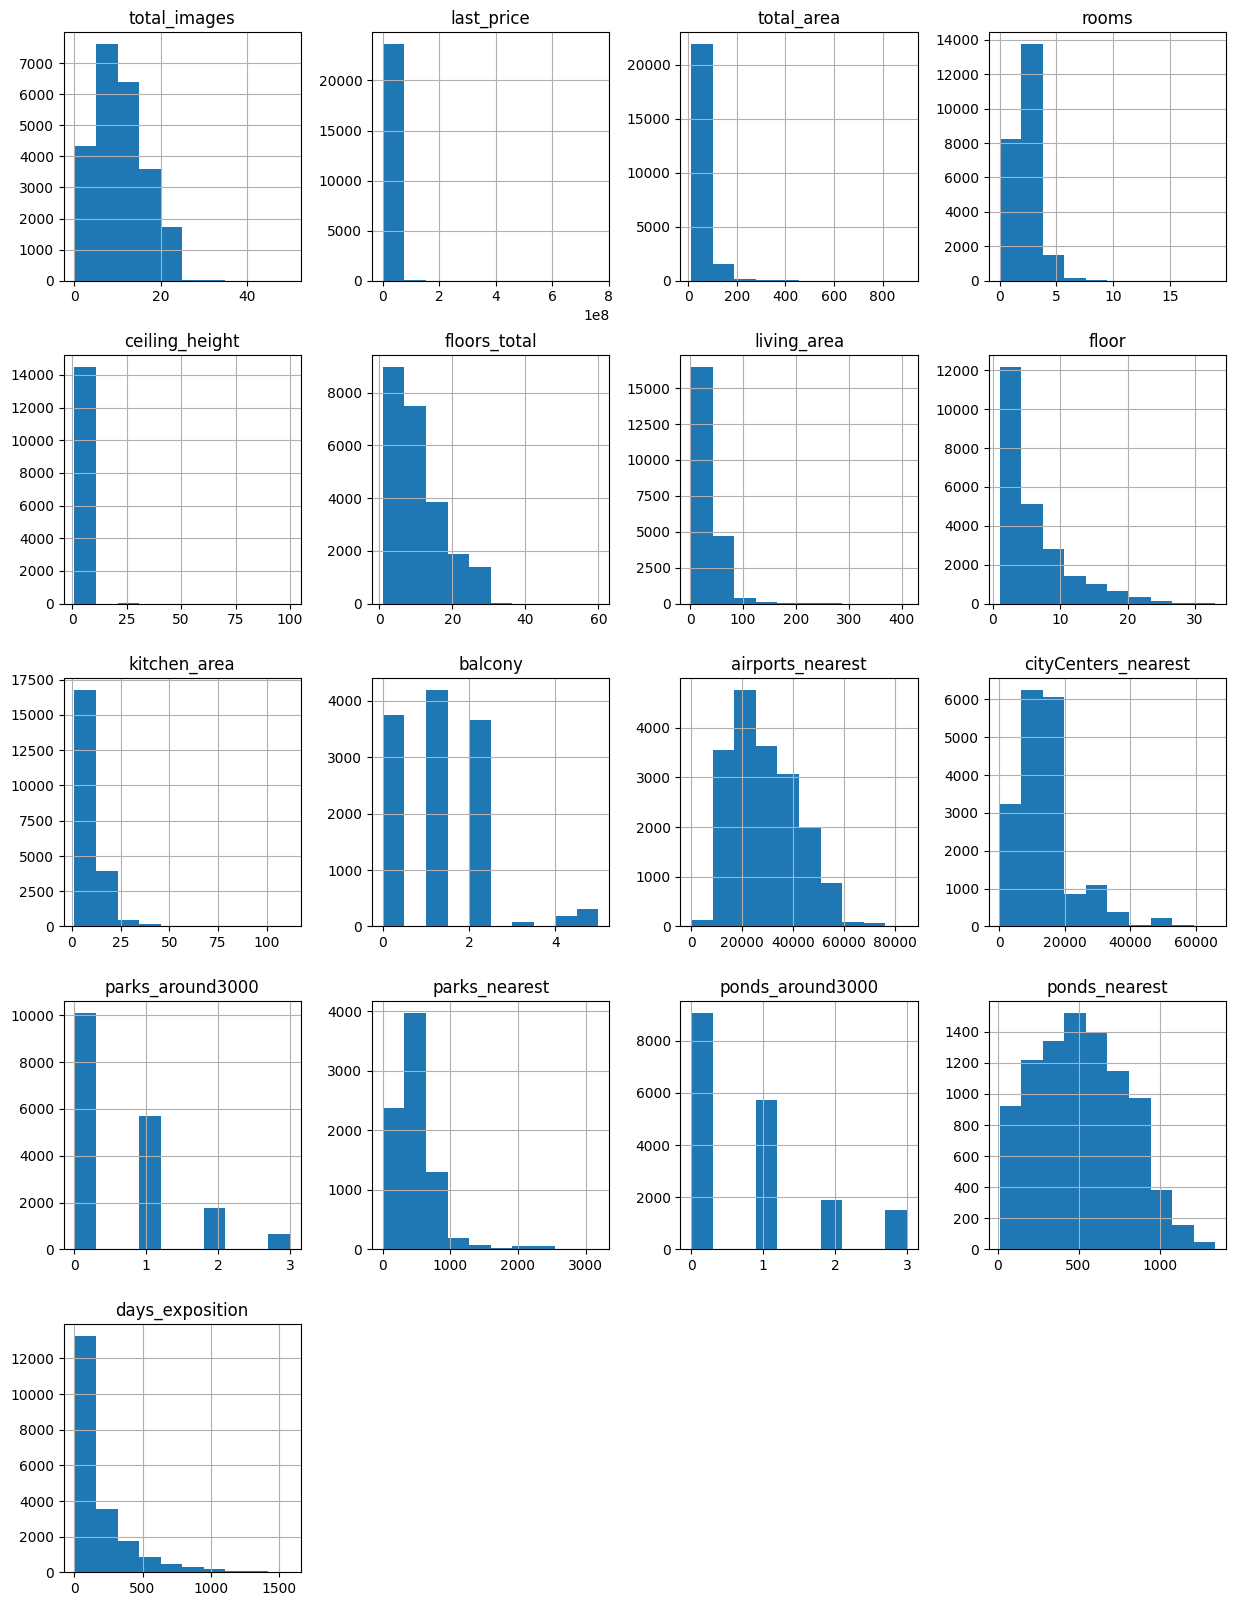

In [10]:
data.hist(figsize=(15, 20))
plt.show()

**Вывод:** Исходя из первичного ознакомления с датафреймом, мы видим, что распределение числовых данных неравномерно: в большом количестве присутсвуют нулевые значения и выбросы, искажающие представление о реальных параметрах объектов.

## Предобработка данных

### Работа с пропусками и обработка аномальных значений

#### Определим, в каких столбцах есть пропуски и количество пропущенных значений:

In [11]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Предлагаю рассмотреть детальнее столбцы, где более 1000 пропусков и заполнить пропущенные значения там, где это возможно.

#### Столбец is_apartment:  

Проверим, какую долю занимают пропущенные значения от всех данных в столбце:

In [111]:
print('Доля пропущенных значений в столбце:', 
      round(((data['is_apartment'].isna().sum() / data['is_apartment'].isna().count()) * 100),1))

Доля пропущенных значений в столбце: 88.3


**Вывод**: В данном столбце 88,3% пропущенных значений, и причина пропусков нам неизвестна.  
Возможно, люди не знают отличие апартаментов от квартир и оставляют колонку пустой, возможно забыли указать эту информацию.
Правильно восстановить данные невозможно, так как отсутствуют связи с другими столбцами.    

По существующим данным только 1,8% объектов являются апартаментами.  Также в вопросах, которые ставятся перед ислледованием нигде не упоминается термин апартаменты, следовательно информация в данном столбце не несет для нас ценности.   

**Решение:** Данный столбец будем игнорировать, пропуски не трогаем.

#### Столбец balcony:
 
Если продавец не указал число балконов, то, скорее всего, в его квартире их нет.    

- Заменим пропуски в столбце balcony на нулевые значения:

In [13]:
data['balcony'] = data['balcony'].fillna(0) 

- Убедимся, что в столбце balcony не осталось пропусков. Для этого ещё раз посчитаем пропущенные значения:

In [14]:
print('Количество пропущенных значений:', data['balcony'].isna().sum())

Количество пропущенных значений: 0


#### Столбец living_area:

Основным фактором, определяющим размер жилой площади в квартире, является количество комнат.  

Заменим пропуски в столбце на типичное значение, характерное для квартир с одинаковым количеством комнат.  
Для этого напишем цикл, который: 
- сформирует группы исходя из количества комнат
- задаст условие отбора (какие значения нужно заменить)
- рассчитает медианное значение для каждой из групп и заполнит им пропуски

In [15]:
# поиск уникальных значений в столбце rooms
for room in data['rooms'].unique():  
    # определение среза данных, где будет происходить замена NaN-значений
    data.loc[(data['rooms'] == room) & (data['living_area'].isna()), 'living_area'] = \
    data.loc[(data['rooms'] == room), 'living_area'].median()  # замена пропусков медианным значением для каждой из групп 

Убедимся, что в столбце living_area не осталось пропусков. Для этого ещё раз посчитаем пропущенные значения:

In [112]:
print('Количество пропущенных значений:', data['living_area'].isna().sum())

Количество пропущенных значений: 0


#### Столбец ceiling_height

Познакомимся с характерными значениями столбца, используя метод describe():

In [17]:
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

**Вывод:** Несмотря на то, что среднее значение (2.7 метров) и медианна (2.65 метров) выглядят адекватно, в столбце *ceiling_height* огромный разброс значений. Встречаются квартиры с высотой потолков 1 метр и 100 метров, что выглядит неправдоподобно.  

Скорее всего, в значениях были допущены опечатки. Анализ будет не объективным, если оставить данные в таком виде.  
- Проверим уникальные значения высоты потолков:

In [18]:
data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

В данных действительно присутствуют значения, которые выглядят, как опечатки.  
Скорее всего, владелец квартиры мог неправильно поставить запятую при заполнении объявления.  

- Обработаем явные опечатки, разделив высоту потолков более 10 метров на 10:

In [19]:
ceiling_height_filter = data['ceiling_height'] >= 10
data.loc[ceiling_height_filter, 'ceiling_height'] = data.loc[ceiling_height_filter, 'ceiling_height'] / 10  

Теперь проверим повторно диапазон значений, отобразив их на графике:

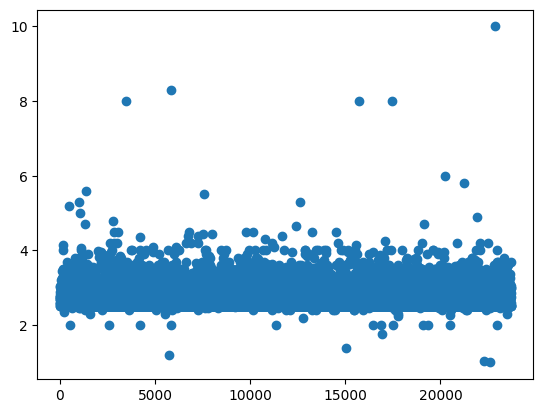

In [20]:
data['ceiling_height'].plot(style='o')
plt.show()

Данные стали более равномерны, но все ещё есть выбивающиеся значения, не похожие на реальные цифры.  
Высота потолков менее 2 метров и более 5 метров является нереалистичной для большинства квартир.

- Проверим, сколько встречается значений в датасете, где высота потолков менее 2.5 и более 5 метров:

In [21]:
data[data['ceiling_height'] < 2.5]['ceiling_height'].value_counts()

2.40    24
2.45    15
2.00    12
2.48     8
2.30     4
2.47     3
2.46     2
1.40     1
2.26     1
2.25     1
1.20     1
1.03     1
2.49     1
2.34     1
1.75     1
2.20     1
1.00     1
Name: ceiling_height, dtype: int64

In [22]:
data[data['ceiling_height'] > 5]['ceiling_height'].value_counts()

8.0     3
5.3     2
5.8     1
6.0     1
8.3     1
5.2     1
5.5     1
10.0    1
5.6     1
Name: ceiling_height, dtype: int64

Установим минимальный и максимальный диапазон значений для потолков.   
***Минимальный*** будет равен 2.3 метра, ***максимальный*** 6 метров. 

- Значения ниже минимального и выше максимального примем за аномальные и исключим из выборки, заменив их на NaN:  

In [23]:
data.loc[data['ceiling_height'] < 2.3, 'ceiling_height'] = np.nan
data.loc[data['ceiling_height'] > 6, 'ceiling_height'] = np.nan

Теперь вернемся к пропущенным значениям. Проверим, зависит ли высота потолков от населенного пункта, где расположен объект.
- Для начала посчитаем, сколько объявлений находится в каждом из населенных пунктов: 

In [24]:
data['locality_name'].value_counts()

Санкт-Петербург        15721
посёлок Мурино           522
посёлок Шушары           440
Всеволожск               398
Пушкин                   369
                       ...  
поселок Рабитицы           1
поселок Володарское        1
село Никольское            1
деревня Нижняя             1
поселок Коммунары          1
Name: locality_name, Length: 364, dtype: int64

Объявления из Санкт-Петербурга превалируют. Чтобы характерные значения были более объективны, проверим разброс высоты в Санкт-Петербруге и в городах за его пределами. 

- Разделим данные на 2 группы (объекты в Санкт-Петербурге и объекты в других населенных пунктах) и визуализируем высоту потолков для каждой из групп:

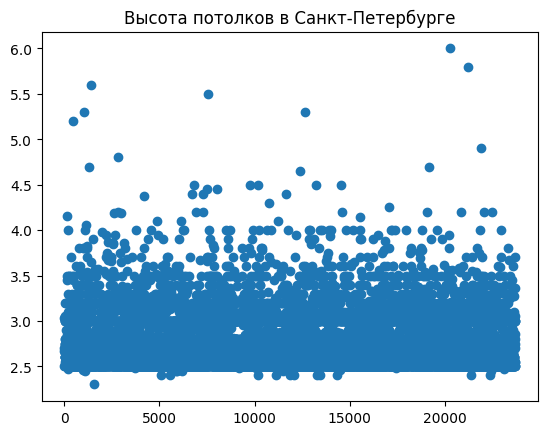

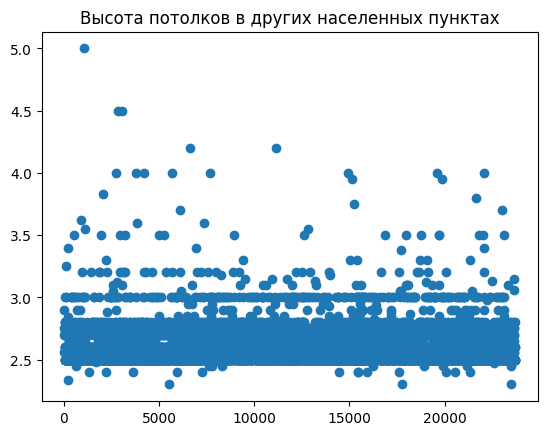

In [25]:
# создаем фильтры для разделения данных на 2 группы:
not_spb_filter = data['locality_name'] != 'Санкт-Петербург'
spb_filter = data['locality_name'] == 'Санкт-Петербург'

# визуализируем данные по каждой из групп:
data.loc[spb_filter, 'ceiling_height'].plot(style='o', title='Высота потолков в Санкт-Петербурге')
plt.show()
data.loc[not_spb_filter, 'ceiling_height'].plot(style='o', title='Высота потолков в других населенных пунктах')
plt.show()

**Вывод:** Исходя из графика, потолки в квартирах, находящихся в Санкт-Петербурге намного выше, чем в остальных городах.  

Данные по высоте потолков в других населенных пунктах расположены довольно равномерно, аномальные значения единичны.    
Предлагаю заменить пропуски во второй группе на медианное значение высоты потолков для неё. 

In [26]:
# Расчитаем медианну для объектов за пределами СПб:
median_not_spb = data.loc[not_spb_filter, 'ceiling_height'].median()

#Заполняем пропуски:
data.loc[not_spb_filter, 'ceiling_height'] = data.loc[not_spb_filter, 'ceiling_height'].fillna(median_not_spb)

In [27]:
# выводим количество пустых значений чтобы убедиться, что пропуски заполнены:
print('not_spb:', data.loc[not_spb_filter, 'ceiling_height'].isna().sum())
print('spb:', data.loc[~not_spb_filter, 'ceiling_height'].isna().sum())

not_spb: 0
spb: 5628


Для объектов в Санкт-Петербурге использовать такой же метод некорректно, так как в городе довольно много квартир с высокими потолками и это может исказить даннные. Проверим, зависит ли высота потолков в Санкт-Петербурге от расстояния до центра города.  
- Сгруппируем данные по расстоянию до центра города и выясним средние значения высоты потолков: 

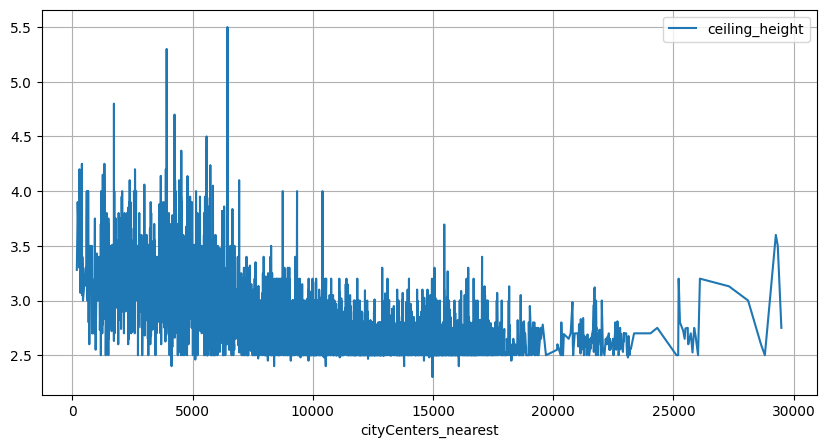

In [28]:
data.loc[spb_filter].pivot_table(index='cityCenters_nearest', values='ceiling_height').plot(grid=True, figsize=(10, 5))
plt.show()

**Вывод**: Зависимость высоты потолков от расстояния до центра города прослеживается для объектов, находящихся в пределах 20 километров от центра города.
- Рассчитаем также коэффициент корреляции между этими значениями:

In [29]:
data.loc[spb_filter]['cityCenters_nearest'].corr(data.loc[spb_filter]['ceiling_height'])

-0.552371065201404

Коэффициент корреляции -0.55 также говорит о наличии отрицательной связи.  
Значение может быть невысоким за счет наличия квартир, находящихся дальше 20 километров от центра города, где связь уже не прослеживается.

**Вывод**: Квартиры с высокими потолками преимущественно расположены близко к центру города.

- Попробуем заполнить пропуски в квартирах Санкт-Петербурга исходя их медианного значения по удаленности от центра:

In [30]:
# Разобъем наш срез на 4 группы по удаленности от центра СПб:
pd.qcut(data.loc[spb_filter]['cityCenters_nearest'], 4)

0        (14943.0, 29493.0]
2        (12244.5, 14943.0]
3         (180.999, 8327.0]
4         (180.999, 8327.0]
7         (8327.0, 12244.5]
                ...        
23689    (14943.0, 29493.0]
23690     (180.999, 8327.0]
23691     (180.999, 8327.0]
23694     (180.999, 8327.0]
23697     (8327.0, 12244.5]
Name: cityCenters_nearest, Length: 15721, dtype: category
Categories (4, interval[float64]): [(180.999, 8327.0] < (8327.0, 12244.5] < (12244.5, 14943.0] < (14943.0, 29493.0]]

Итого у нас получилось 4 интервала:
- 180.999 м - 8327 м
- 8327 м - 12244.5 м
- 12244.5 м - 14943 м
- 14943 м - 29493 м  


Напишем функцию, которая категоризирует по группам квартиры:

In [31]:
def distance_to_city_centre(distance):
        if distance <= 8327:
            return 'в пределах центра'
        elif 8327 < distance <= 12244.5:
            return 'близко к центру'
        elif 12244.5 < distance <= 14943.0:
            return 'среднее расстояние'
        elif distance > 14943:
            return 'далеко от центра'
                
# категоризируем квартиры и зафиксируем категорию в новом стоблце distance_to_city_centre:        
data['distance_to_city_centre'] = data.loc[spb_filter, 'cityCenters_nearest'].apply(distance_to_city_centre)

- Теперь заполним пропуски в квартирах Санкт-Петербурга исходя из медианного значения для их группы:

In [32]:
# cделаем фильтр, чтобы исключить пропуски в группе при рассчете медианы:
none_filter = ~ data['distance_to_city_centre'].isna()

for i in data.loc[spb_filter & none_filter, 'distance_to_city_centre'].unique():  
    data.loc[(data['distance_to_city_centre'] == i) & (data['ceiling_height'].isna()), 'ceiling_height'] = \
    data.loc[(data['distance_to_city_centre'] == i), 'ceiling_height'].median()
    
# проверим, остались ли у нас NaN-значения в столбце ceiling_height:
print('Количество пропусков:', data['ceiling_height'].isna().sum())

Количество пропусков: 30


Осталось 30 квартир с пропусками, в которых не указаны сведения о расстоянии до центра города.    
- Так как выборка небольшая, предлагаю заполнить эти пропуски медианным значением по Санкт-Петербургу:

In [113]:
# рассчитаем медианное значение высоты потолков квартир в СПб:
spb_median = data.loc[spb_filter, 'ceiling_height'].median()

# заполним пропуски медианой:
data['ceiling_height'] = data['ceiling_height'].fillna(spb_median)

# проверим, не осталось ли пропусков в столбце:
print('Количество пропущенных значений:', data['ceiling_height'].isna().sum())

Количество пропущенных значений: 0


#### Столбец floors_total

In [114]:
# Заполним пропуски "значением-заглушкой" для дальнейшей работы со столбцом:
data['floors_total'] = data['floors_total'].fillna(0)

# Проверим, остались ли пропуски в столбце:
print('Количество пропущенных значений:', data['floors_total'].isna().sum())

Количество пропущенных значений: 0


<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Если пропусков меньше 5% их лучше сразу удалить, дабы сэкономить время

В остальных столбцах логичную замену предложить невозможно, поэтому оставим эти значения пустыми.   
Пропуски — тоже важный сигнал, который нужно учитывать. Возможные причины появления пропусков:
- Продавец забыл указать некоторые сведения о квартире  
- Некоторые поля при заполнении объявления были не обязательными и продавец проигнорировал их заполнение  
- Площадка при размещении объявления некоррекно сохранила данные (потеря данных)  
- Иногда пропуски оставляют умышленно, рассчитывая на автозаполнение системой  

### Работа с типами данных

####  Рассмотрим типы данных в каждом столбце:

In [35]:
data.dtypes

total_images                 int64
last_price                 float64
total_area                 float64
first_day_exposition        object
rooms                        int64
ceiling_height             float64
floors_total               float64
living_area                float64
floor                        int64
is_apartment                object
studio                        bool
open_plan                     bool
kitchen_area               float64
balcony                    float64
locality_name               object
airports_nearest           float64
cityCenters_nearest        float64
parks_around3000           float64
parks_nearest              float64
ponds_around3000           float64
ponds_nearest              float64
days_exposition            float64
distance_to_city_centre     object
dtype: object

####  Для удобства дальнейшего анализа и выявления закономерностей, изменим типы данных в некоторых столбцах:

In [36]:
# меняем тип данных на int:
data['parks_around3000'] = data['parks_around3000'].astype('Int64')
data['ponds_around3000'] = data['ponds_around3000'].astype('Int64')
data['floors_total'] = data['floors_total'].astype(int)
data['balcony'] = data['balcony'].astype('Int64')

# меняем тип данных на datetime:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

# меняем тип данных на bool:
data['is_apartment'] = data['is_apartment'].astype('boolean', errors='ignore')

<div class="alert alert-block alert-success">✔️
    

Комментарий:

Заменить на быстрый astype

###  Работа с дубликатами

#### Проведем проверку на явные дубликаты во всем датасете:

In [37]:
print('Количество явных дубликатов:', data.duplicated().sum())

Количество явных дубликатов: 0


Все строки в датасете уникальные, поэтому дальнейшей обработки не требуется.  

#### Перейдем к поиску неявных дубликатов

Все характеристики объектов численные, за исключением категорий в столбце *distance_to_city_centre*, созданной для определения средней высоты потолков в Санкт-Петербурге, и столбца с наименованиями населенных пунктов *locality_name*.  

Категории были присвоены мною собственноручно, поэтому сосредоточимся на столбце **locality_name**.

#### Выведем список уникальных значений столбца locality_name:

In [115]:
data['locality_name'].unique()

array(['санкт-петербург', 'поселок шушары', 'городской поселок янино-1',
       'поселок парголово', 'поселок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок городского типа красный бор', 'гатчина',
       'деревня федоровское', 'выборг', 'кронштадт', 'кировск',
       'деревня новое девяткино', 'поселок металлострой',
       'поселок городского типа лебяжье',
       'поселок городского типа сиверский', 'поселок молодцово',
       'поселок городского типа кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'поселок аннино',
       'поселок городского типа ефимовский', 'поселок плодовое',
       'деревня заклинье', 'поселок торковичи', 'поселок первомайское',
       'красное село', 'поселок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', 'поселок новый свет

В наименованиях населенных пунктов присутствует много неявных дубликатов. Попробуем привести названия их к единообразию.

#### Избавимся от очевидных дубликатов, приведя все значения к нижнему регистру и заменив букву ё на е для единообразия:

In [39]:
data['locality_name'] = data['locality_name'].str.lower()
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Можно например вот так:
    
    df = df.apply(lambda x: x.replace({'поселок':'посёлок', 'городской посёлок': 'посёлок', 'посёлок городского типа': 'посёлок', 'коттеджный посёлок': 'посёлок', 'посёлок при железнодорожной станции': 'посёлок станции'}, regex=True))

    len(df.locality_name.unique())
    
</div>

In [40]:
# проверим пустые значения в столбце:
print('Количество пропусков:', len(data[data['locality_name'].isna()]))

Количество пропусков: 49


In [41]:
# заполним пропуски значением unknown:
data['locality_name'] = data['locality_name'].fillna('unknown') 

#### Посмотрим на уникальные значения locality_name и частые слова внутри них:

In [42]:
# создадим список из уникальных значений столбца:
unique_localities = data['locality_name'].dropna().unique().tolist()

# создадим список words, в котором каждое слово будет отдельным элементом:
words = list(np.concatenate([i.split(' ') for i in unique_localities]))

# создадим переменную freq и посчитаем как часто встречается каждое из уникальных значений:
freq = pd.Series(words).value_counts()
freq.head(10)

поселок         167
деревня         106
городского       30
типа             30
городской        13
село             10
станции           8
бор               6
товарищество      5
старая            4
dtype: int64

In [43]:
# составим множество "префиксов" - наименований типа населенного пункта, идущих перед названием:
prefix_words = set(freq[freq > 2].index)
prefix_words

{'большая',
 'бор',
 'городского',
 'городской',
 'деревня',
 'коттеджный',
 'павлово',
 'поселок',
 'садовое',
 'село',
 'станции',
 'старая',
 'типа',
 'товарищество'}

In [44]:
# исключим вручную лишние слова, которые не являются префиксами:
prefix_words -= {'большая', 'бор', 'павлово', 'старая'}
prefix_words

{'городского',
 'городской',
 'деревня',
 'коттеджный',
 'поселок',
 'садовое',
 'село',
 'станции',
 'типа',
 'товарищество'}

In [45]:
# добавим вручную нужные слова, которые попали под фильтр:
prefix_words.update({'железнодорожной', 'при'})  
prefix_words

{'городского',
 'городской',
 'деревня',
 'железнодорожной',
 'коттеджный',
 'поселок',
 'при',
 'садовое',
 'село',
 'станции',
 'типа',
 'товарищество'}

In [46]:
# создадим функцию, которая возвращает наименование для населенного пункта:
def process_locality_name(name):
    splitted = name.split(' ')
    name = []
    for i in splitted:
        if i not in prefix_words:
            name.append(i)
    return ' '.join(name)

In [47]:
# создадим функцию, которая возвращает префикс для населенного пункта:
def process_locality_prefix(prefix):
    splitted = prefix.split(' ')
    prefix = []
    for i in splitted:
        if i in prefix_words:
            prefix.append(i)
    return ' '.join(prefix)

In [48]:
# применим функции к столбцу locality_name и сохраним данные в соответствующие колонки - process_locality_name и locality_prefix:
data['processed_locality_name'] = data['locality_name'].apply(process_locality_name)
data['prefix'] = data['locality_name'].apply(process_locality_prefix)

# выведем на экран полученные данные:
data[['locality_name', 'prefix', 'processed_locality_name']]

,locality_name,prefix,processed_locality_name
0,санкт-петербург,,санкт-петербург
1,поселок шушары,поселок,шушары
2,санкт-петербург,,санкт-петербург
3,санкт-петербург,,санкт-петербург
4,санкт-петербург,,санкт-петербург
...,...,...,...
23694,санкт-петербург,,санкт-петербург
23695,тосно,,тосно
23696,село рождествено,село,рождествено
23697,санкт-петербург,,санкт-петербург


In [49]:
# посчитаем количество значений в столбце prefix:
data['prefix'].value_counts()

                                       19879
поселок                                 2092
деревня                                  945
поселок городского типа                  363
село                                     210
городской поселок                        187
поселок станции                           13
садовое товарищество                       4
коттеджный поселок                         3
поселок при железнодорожной станции        2
товарищество                               1
Name: prefix, dtype: int64

In [50]:
print(f"Всего возможных префиксов, включая пустой: {data['prefix'].nunique()}")

Всего возможных префиксов, включая пустой: 11


**Вывод**: Большая часть префиксов имеет разный смысл. Но есть три пары, которые являются неявными дубликатами: 
- "поселок при железнодорожной станции" и "поселок станции"
- "садовое товарищество" и "товарищество"
- "поселок городского типа" и "городской поселок"

#### Заменим префиксы-дубликаты на единое значение для каждой из пар:

In [51]:
# создадим словарь с парами:
mapping = {
    'городской поселок': 'поселок городского типа',
    'поселок станции': 'поселок при железнодорожной станции',
    'товарищество': 'садовое товарищество',
}

# заменим неявные дубликаты:
data['prefix'].replace(mapping, inplace=True)
data['prefix'].value_counts()

                                       19879
поселок                                 2092
деревня                                  945
поселок городского типа                  550
село                                     210
поселок при железнодорожной станции       15
садовое товарищество                       5
коттеджный поселок                         3
Name: prefix, dtype: int64

#### Теперь рассмотрим случаи, когда одно наименование имеет разные префиксы.

  Будем руководствоваться следующим **правилом:**  

если для наименования есть ***много префиксов*** - мы не будем делать ***ничего***, а если один и ***только один префикс***, то ***все пустые префиксы*** для этого наименования мы можем ***заменить на него.***

In [52]:
# чтобы было нагляднее, заменим префикс равный пустой строке на 'empty':
data['prefix'].replace('', 'empty', inplace=True)

#### Посчитаем, сколько префиксов соответствует каждому из наименований.  

Для этого сгруппируем данные по наименованию населенного пункта и введем 4 столбца:  
- *unique_prefixes* - значения уникальных префиксов
- *unique_prefixes_count* - количество уникальных префиксов  
- *unique_prefixes_without_empty* - значения уникальных префиксов без пустых строк  
- *unique_prefixes_without_empty_count* - количество уникальных префиксов без пустых строк

In [53]:
# сгруппируем данные по наименованию населенного пункта и сохраним в переменной pref
pref = data.groupby('processed_locality_name', as_index=False).agg(   # рассчитаем параметры для данных в pref:
    unique_prefixes=('prefix', set),
    unique_prefixes_count=('prefix', lambda x: len(set(x))),
    unique_prefixes_without_empty=('prefix', lambda x: set([i for i in x if i != 'empty'])),
    unique_prefixes_without_empty_count=('prefix', lambda x: len(set([i for i in x if i != 'empty']))),
)
pref.head()

,processed_locality_name,unique_prefixes,unique_prefixes_count,unique_prefixes_without_empty,unique_prefixes_without_empty_count
0,unknown,{empty},1,{},0
1,агалатово,{деревня},1,{деревня},1
2,александровская,{поселок},1,{поселок},1
3,алексеевка,{поселок},1,{поселок},1
4,аннино,{поселок},1,{поселок},1


In [54]:
print('Количество значений с префиксами:', len(pref))

Количество значений с префиксами: 306


In [55]:
# наименования с мульти-префиксами:
pref[pref['unique_prefixes_count'] > 1]

,processed_locality_name,unique_prefixes,unique_prefixes_count,unique_prefixes_without_empty,unique_prefixes_without_empty_count
42,гарболово,"{деревня, поселок}",2,"{деревня, поселок}",2
51,громово,"{поселок при железнодорожной станции, поселок}",2,"{поселок при железнодорожной станции, поселок}",2
66,зимитицы,"{деревня, поселок}",2,"{деревня, поселок}",2
73,калитино,"{деревня, поселок}",2,"{деревня, поселок}",2
108,кудрово,"{деревня, empty}",2,{деревня},1
122,лесное,"{коттеджный поселок, поселок}",2,"{коттеджный поселок, поселок}",2
132,любань,"{поселок, empty}",2,{поселок},1
147,мурино,"{поселок, empty}",2,{поселок},1
155,никольское,"{empty, село}",2,{село},1
168,павлово,"{поселок городского типа, село}",2,"{поселок городского типа, село}",2


In [56]:
# создадим переменную for_change и сохраним в неё пустые префиксы, которые следует заменить:
for_change = pref[
    (pref['unique_prefixes_count'] > 1)
    & (pref['unique_prefixes_without_empty_count'] == 1)
]
for_change

,processed_locality_name,unique_prefixes,unique_prefixes_count,unique_prefixes_without_empty,unique_prefixes_without_empty_count
108,кудрово,"{деревня, empty}",2,{деревня},1
132,любань,"{поселок, empty}",2,{поселок},1
147,мурино,"{поселок, empty}",2,{поселок},1
155,никольское,"{empty, село}",2,{село},1


В значениям выше мы видим четыре названия, для которых можем заполнить пустые префиксы известными.  
Сделаем это:

In [57]:
# создадим словарь для замены префиксов из столбцов processed_locality_name + unique_prefixes_without_empty:
new_pref_mapping = dict(zip(
    for_change['processed_locality_name'],
    for_change['unique_prefixes_without_empty'].apply(lambda x: list(x)[0]),
))

new_pref_mapping

{'кудрово': 'деревня',
 'любань': 'поселок',
 'мурино': 'поселок',
 'никольское': 'село'}

In [58]:
data[data['processed_locality_name'] == 'любань']['prefix']

3891       empty
5633       empty
8832       empty
12925    поселок
14487    поселок
18035      empty
20419      empty
21176      empty
21181      empty
21765      empty
23391    поселок
Name: prefix, dtype: object

In [59]:
# заменим значениями из словаря соответствующие пустые строки:
for name, pref in new_pref_mapping.items():
    data.loc[data['processed_locality_name'] == name, 'prefix'] = pref
    
data[data['processed_locality_name'] == 'любань']['prefix']

3891     поселок
5633     поселок
8832     поселок
12925    поселок
14487    поселок
18035    поселок
20419    поселок
21176    поселок
21181    поселок
21765    поселок
23391    поселок
Name: prefix, dtype: object

#### Создадим новый столбец с очищенными данными от неявных дубликатов в наименовании:

In [60]:
data['prefix'].replace('empty', '', inplace=True)
data['prefix'] = data['prefix'].apply(lambda x: x + ' ' if x != '' else x)  # добавим пробел после префикса
data['clean_locality_name'] = data['prefix'] + data['processed_locality_name'].map(str.title)

In [61]:
data[data['clean_locality_name'] == 'Unknown'][['locality_name', 'clean_locality_name']].head()

,locality_name,clean_locality_name
1097,unknown,Unknown
2033,unknown,Unknown
2603,unknown,Unknown
2632,unknown,Unknown
3574,unknown,Unknown


In [62]:
data['clean_locality_name'].replace('Unknown', None, inplace=True)

In [63]:
data.drop(columns = ['prefix', 'processed_locality_name'], inplace=True)

In [64]:
data[['locality_name', 'clean_locality_name']]

,locality_name,clean_locality_name
0,санкт-петербург,Санкт-Петербург
1,поселок шушары,поселок Шушары
2,санкт-петербург,Санкт-Петербург
3,санкт-петербург,Санкт-Петербург
4,санкт-петербург,Санкт-Петербург
...,...,...
23694,санкт-петербург,Санкт-Петербург
23695,тосно,Тосно
23696,село рождествено,село Рождествено
23697,санкт-петербург,Санкт-Петербург


#### Сравним данные до очистки и после и оценим результат:

In [65]:
print(f"Количество уникальных наименований до чистки: {data['locality_name'].nunique()}") 
print(f"Количество уникальных наименований после чистки: {data['clean_locality_name'].nunique()}")

Количество уникальных наименований до чистки: 331
Количество уникальных наименований после чистки: 317


In [66]:
data[data['clean_locality_name'] != data['locality_name']][['locality_name', 'clean_locality_name']]

,locality_name,clean_locality_name
0,санкт-петербург,Санкт-Петербург
1,поселок шушары,поселок Шушары
2,санкт-петербург,Санкт-Петербург
3,санкт-петербург,Санкт-Петербург
4,санкт-петербург,Санкт-Петербург
...,...,...
23694,санкт-петербург,Санкт-Петербург
23695,тосно,Тосно
23696,село рождествено,село Рождествено
23697,санкт-петербург,Санкт-Петербург


In [67]:
data['locality_name'].isna().sum()

0

**Вывод:** Проведя очистку неявных дубликатов в части наименования населенных пунктов, где расположены объекты, мы сократили количество только уникальных наименований на 14 шт. При этом, если смотреть на долю от общего массива данных, на эти дубликаты пришлось несколько тысяч строк. Таким образом, мы почистили около 10% данных.   

<div class="alert alert-block alert-success">✔️
    

Комментарий:
    
Подкрепить расчетом % сколько почистили данных

**Общий вывод:** В процессе предобрабоки данных были обнаружены следующие особенности:
- Потолки в квартирах, находящихся в Санкт-Петербурге намного выше, чем в остальных городах
- Данные по высоте потолков в других населенных пунктах расположены довольно равномерно, аномальные значения единичны
- В данных встречались аномальные значения, которые выглядели крайне неправдоподобно
- Некоторые данные не указаны самим продавцом, скорее всего, по причине пропуска ячеек при заполнении объявления


## Добавление новых параметров

### Посчитаем и добавим в таблицу новые столбцы: 

- *price_per_square meter* - цена одного квадратного метра;
- *day_exposition* - день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- *month_exposition* - месяц публикации объявления;
- *year_exposition* - год публикации объявления;
- *floor_type* - тип этажа (значения — «первый», «последний», «другой»);
- *cityCenters_km* - расстояние до центра города в километрах


#### Цена одного квадратного метра:

In [118]:
data['price_per_square_meter'] = round((data['last_price'] / data['total_area']), 2) 
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,distance_to_city_centre,clean_locality_name,price_per_square_meter,day_exposition,month_exposition,year_exposition,floor_type,cityCenters_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,<NA>,...,755.0,NaN,далеко от центра,Санкт-Петербург,120370.37,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.60,11,18.6,1,<NA>,...,NaN,81.0,NaN,поселок Шушары,82920.79,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.60,5,34.3,4,<NA>,...,574.0,558.0,среднее расстояние,Санкт-Петербург,92785.71,3,8,2015,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,3.00,14,45.0,9,<NA>,...,234.0,424.0,в пределах центра,Санкт-Петербург,408176.10,4,7,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,<NA>,...,48.0,121.0,в пределах центра,Санкт-Петербург,100000.00,1,6,2018,другой,8.0


#### День недели публикации объявления (0 — понедельник, 1 — вторник и так далее);

In [69]:
data['day_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).weekday 
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,distance_to_city_centre,clean_locality_name,price_per_square_meter,day_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,<NA>,...,16028.0,1,482.0,2,755.0,NaN,далеко от центра,Санкт-Петербург,120370.37,3
1,7,3350000.0,40.4,2018-12-04,1,2.60,11,18.6,1,<NA>,...,18603.0,0,NaN,0,NaN,81.0,NaN,поселок Шушары,82920.79,1
2,10,5196000.0,56.0,2015-08-20,2,2.60,5,34.3,4,<NA>,...,13933.0,1,90.0,2,574.0,558.0,среднее расстояние,Санкт-Петербург,92785.71,3
3,0,64900000.0,159.0,2015-07-24,3,3.00,14,45.0,9,<NA>,...,6800.0,2,84.0,3,234.0,424.0,в пределах центра,Санкт-Петербург,408176.10,4
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,<NA>,...,8098.0,2,112.0,1,48.0,121.0,в пределах центра,Санкт-Петербург,100000.00,1


#### Месяц публикации объявления;

In [70]:
data['month_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).month 
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,distance_to_city_centre,clean_locality_name,price_per_square_meter,day_exposition,month_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,<NA>,...,1,482.0,2,755.0,NaN,далеко от центра,Санкт-Петербург,120370.37,3,3
1,7,3350000.0,40.4,2018-12-04,1,2.60,11,18.6,1,<NA>,...,0,NaN,0,NaN,81.0,NaN,поселок Шушары,82920.79,1,12
2,10,5196000.0,56.0,2015-08-20,2,2.60,5,34.3,4,<NA>,...,1,90.0,2,574.0,558.0,среднее расстояние,Санкт-Петербург,92785.71,3,8
3,0,64900000.0,159.0,2015-07-24,3,3.00,14,45.0,9,<NA>,...,2,84.0,3,234.0,424.0,в пределах центра,Санкт-Петербург,408176.10,4,7
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,<NA>,...,2,112.0,1,48.0,121.0,в пределах центра,Санкт-Петербург,100000.00,1,6


#### Год публикации объявления;

In [71]:
data['year_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).year 
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,distance_to_city_centre,clean_locality_name,price_per_square_meter,day_exposition,month_exposition,year_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,<NA>,...,482.0,2,755.0,NaN,далеко от центра,Санкт-Петербург,120370.37,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,2.60,11,18.6,1,<NA>,...,NaN,0,NaN,81.0,NaN,поселок Шушары,82920.79,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.60,5,34.3,4,<NA>,...,90.0,2,574.0,558.0,среднее расстояние,Санкт-Петербург,92785.71,3,8,2015
3,0,64900000.0,159.0,2015-07-24,3,3.00,14,45.0,9,<NA>,...,84.0,3,234.0,424.0,в пределах центра,Санкт-Петербург,408176.10,4,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,<NA>,...,112.0,1,48.0,121.0,в пределах центра,Санкт-Петербург,100000.00,1,6,2018


<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__

Совет на будущие работы (в этом проекте этот метод не нужен): обычно в датафреймах содержатся данные за несколько лет. Важно выбрать корректный метод для вычленения месяца, иначе месяца разных годов могут стать одним месяцем. Обрати внимание на метод astype('datetime64[M]'). Для его использования не нужно обращаться к pd.DatetimeIndex. 
    
Вот хорошая статья на этот счёт: 
    
    https://runebook.dev/ru/docs/numpy/reference/arrays.datetime
    
    и
    
    https://stackoverflow.com/questions/70901855/get-hour-and-minutes-and-seconds-from-numpy-datetime64
</div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №2__

Этот метод нужен для визуализации динамики по неделям, месяцам или годам (смотря какой метод выберешь)
    
Код выглядит так:
    
        df['first_day_exposition'].dt.date #приводим к временному формату
        df['first_day_exposition'].astype('datetime64[M]') 
    
Если года разные, то в новой колонке месяца у тебя отобразится первый день месяца ('2019-05-01')
</div>


#### Тип этажа квартиры (значения — «‎первый», «последний», «другой»);

In [72]:
def floor_type(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor != 1:
        if floor == floors_total:
            return 'последний'
    if floor == 1 and floors_total != 0:
        return 'первый'
    else:
        return 'другой'
        
data['floor_type'] = data.apply(floor_type, axis=1)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,distance_to_city_centre,clean_locality_name,price_per_square_meter,day_exposition,month_exposition,year_exposition,floor_type
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,<NA>,...,2,755.0,NaN,далеко от центра,Санкт-Петербург,120370.37,3,3,2019,другой
1,7,3350000.0,40.4,2018-12-04,1,2.60,11,18.6,1,<NA>,...,0,NaN,81.0,NaN,поселок Шушары,82920.79,1,12,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,2.60,5,34.3,4,<NA>,...,2,574.0,558.0,среднее расстояние,Санкт-Петербург,92785.71,3,8,2015,другой
3,0,64900000.0,159.0,2015-07-24,3,3.00,14,45.0,9,<NA>,...,3,234.0,424.0,в пределах центра,Санкт-Петербург,408176.10,4,7,2015,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,<NA>,...,1,48.0,121.0,в пределах центра,Санкт-Петербург,100000.00,1,6,2018,другой


####  Расстояние до центра города в километрах (переведите из м в км и округлите до целых значений));

In [73]:
data['cityCenters_km']= round(data['cityCenters_nearest'] / 1000)
data['cityCenters_km'].head(10)

0    16.0
1    19.0
2    14.0
3     7.0
4     8.0
5     NaN
6    19.0
7    12.0
8     NaN
9    15.0
Name: cityCenters_km, dtype: float64

## Исследовательский анализ данных

### Изучим основные параметры объектов, визуализировав данные на графиках:

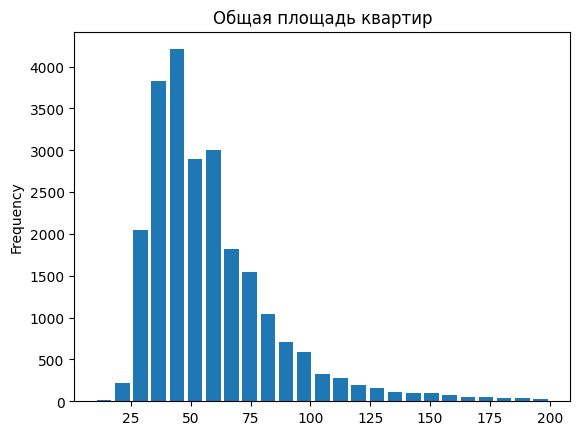

In [74]:
# Общая площадь квартир:
data.plot(
    kind='hist',
    y='total_area',
    range=(10, 200),
    bins=25,
    title='Общая площадь квартир',
    rwidth=0.8,
    legend=False)
plt.show()

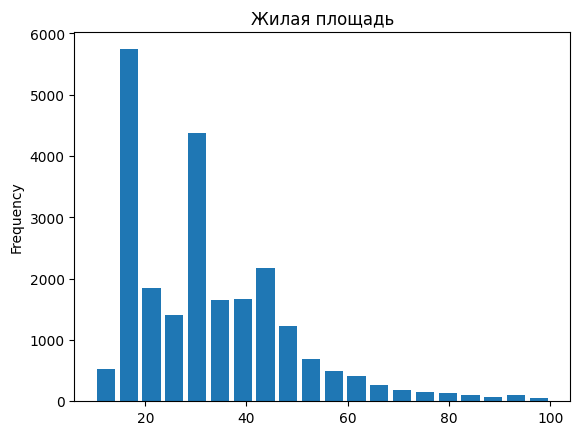

In [75]:
# Жилая площадь квартир:
data.plot(
    kind='hist',
    y='living_area',
    bins=20,
    range=(10, 100),
    title='Жилая площадь',
    rwidth=0.8,
    legend=False)
plt.show()

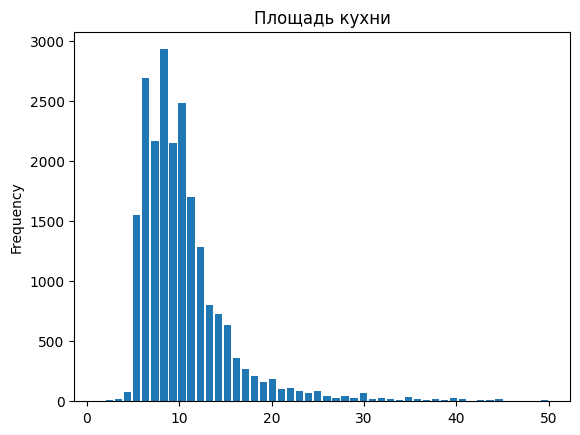

In [76]:
# Площадь кухни:
data.plot(
    kind='hist',
    y='kitchen_area',
    bins=50,
    range=(1, 50),
    title='Площадь кухни',
    rwidth=0.8,
    legend=False)
plt.show()

**Выводы по площадям:**

- Большая часть квартир имеет общую площадь от 30 до 50 квадратных метров
- Жилая площадь квартир колеблется в диапазоне 17-20 квадратных метров, второй пик приходится на значения около 30 квадратных метров
- Площадь кухни в квартирах в среднем составляет от 6 до 10 квадратных метров

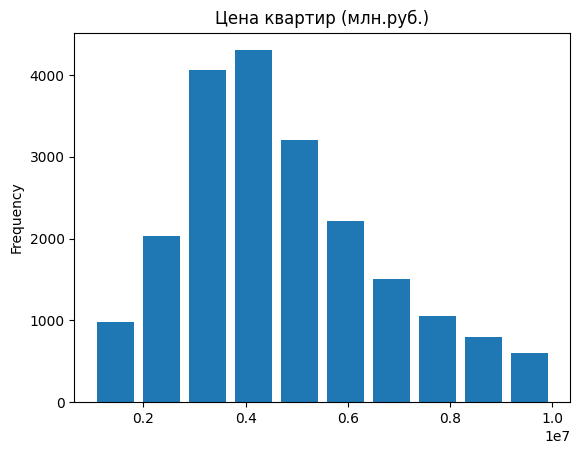

In [77]:
# Цена квартир:
data.plot(
    kind='hist',
    y='last_price',
  range=(1000000, 10000000),
    title='Цена квартир (млн.руб.)',
    rwidth=0.8,
    legend=False)
plt.show()

**Вывод по стоимости квартир:**
- Средняя цена объектов вне зависимости от других параметров составляет от 3 до 4 млн.руб.
- Чем выше цена на квартиру, тем меньше количество объявлений в базе

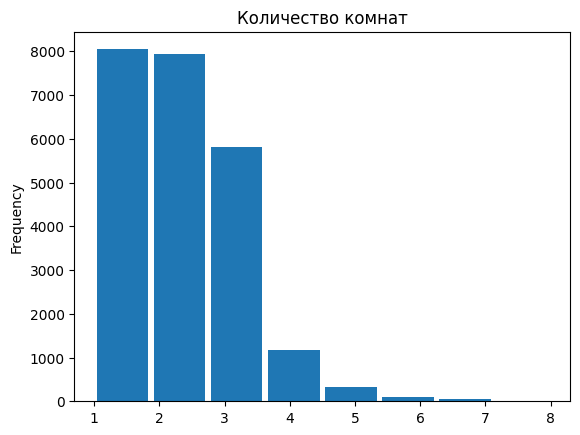

In [78]:
# Количество комнат:
data.plot(
    kind='hist',
    y='rooms',
    bins=8,
    range=(1, 8),
    title='Количество комнат',
    rwidth=0.9,
    legend=False)
plt.show()

**Вывод:**
- Количество комнат в квартирах чаще всего составляет одна, либо 2 комнаты
- Чем больше комнат, тем меньшее количество объектов мы встречаем в базе

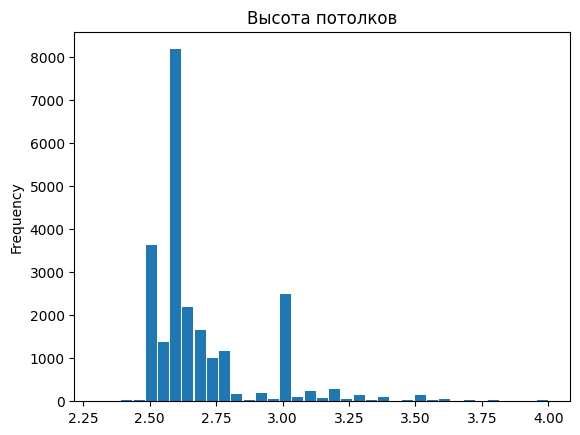

In [119]:
# Высота потолков:
data.plot(
    kind='hist',
    y='ceiling_height',
    bins=37,
    range=(2.3, 4),
    title='Высота потолков',
    rwidth=0.9,
    legend=False)
plt.show()

In [121]:
data['ceiling_height'].describe()

count    23699.000000
mean         2.703826
std          0.236013
min          2.300000
25%          2.600000
50%          2.600000
75%          2.750000
max          6.000000
Name: ceiling_height, dtype: float64

**Вывод**:
- Высота потолков в большинстве квартир составляет 2.6 метра
- Второй рубеж находится около 2.5 метров, и третий приходится на 3 метра
- Квартир с потолками болеее трёх метров представлено крайне мало

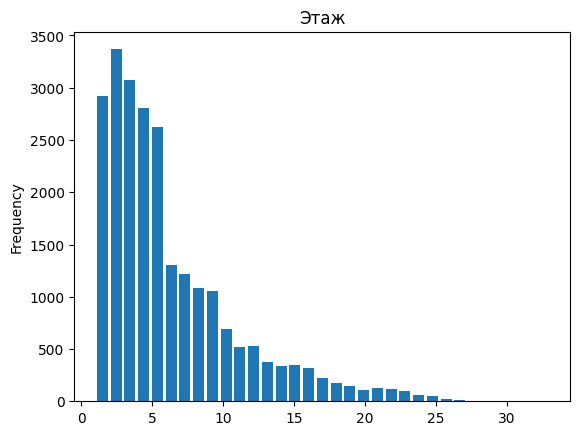

In [80]:
# Этаж
data.plot(
    kind='hist',
    y='floor',
    bins=33,
    range=(1, 33),
    title='Этаж',
    rwidth=0.8,
    legend=False)
plt.show()

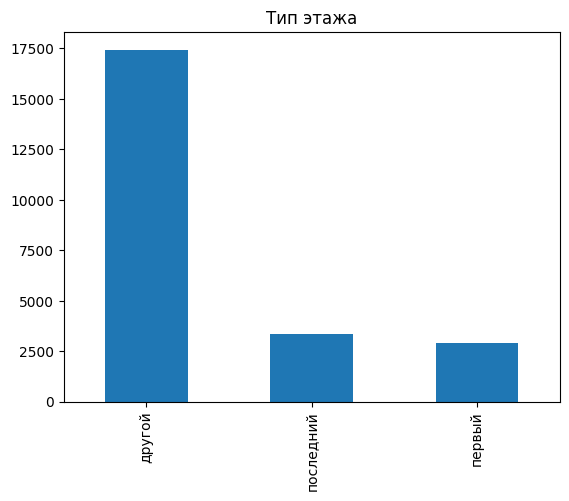

In [81]:
# тип этажа:
data['floor_type'].value_counts().plot(kind='bar', title='Тип этажа')
plt.show()

<div class="alert alert-block alert-success">✔️
    

Комментарий:
Перевернуть надписи возможно ли?
</div>

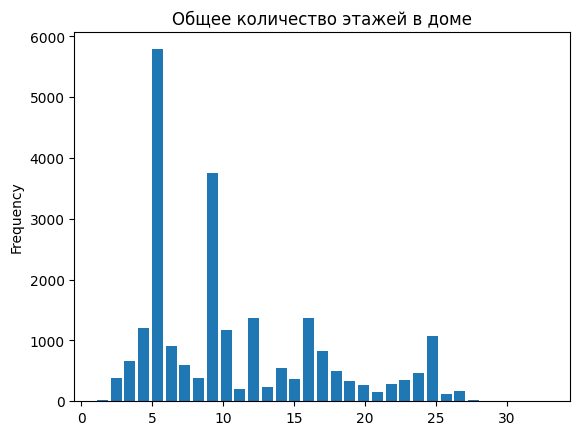

In [82]:
# Общее количество этажей в доме:
data.plot(
    kind='hist',
    y='floors_total',
    bins=33,
    range=(1, 33),
    title='Общее количество этажей в доме',
    rwidth=0.8,
    legend=False)
plt.show()

**Выводы по этажности:**
- Самые распространенные этажи квартир в объявлениях: с первого по пятый, самый популярный - второй;
- Квартир на первом и последнем этажах сдается крайне мало, основную массу составляют другие этажи;
- Больше всего в базе размещено 5 и 9-ти этажных домов;

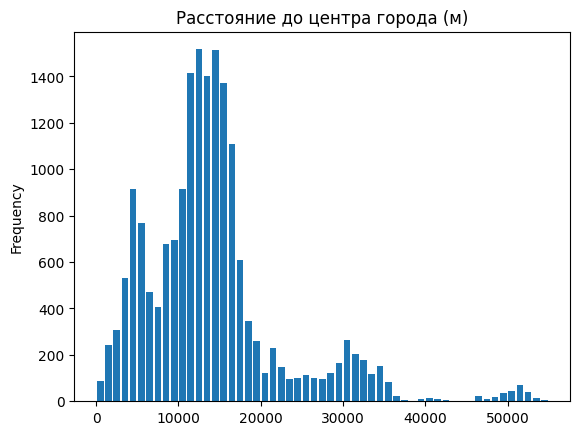

In [83]:
# Расстояние до центра города в метрах:
data.plot(
    kind='hist',
    y='cityCenters_nearest',
    bins= 55,
    range=(0, 55000),
    title='Расстояние до центра города (м)',
    rwidth=0.8,
    legend=False)
plt.show()

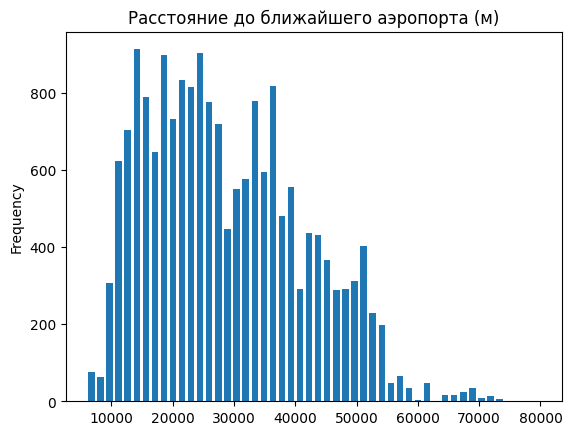

In [84]:
# Расстояние до ближайшего аэропорта:
data.plot(
    kind='hist',
    y='airports_nearest',
    title='Расстояние до ближайшего аэропорта (м)',
    bins= 50,
    range=(6000, 80000),
    rwidth=0.7,
    legend=False)
plt.show()

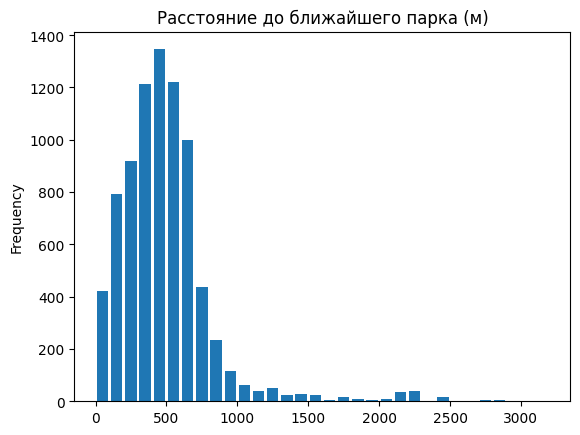

In [85]:
# Расстояние до ближайшего парка:
data.plot(
    kind='hist',
    y='parks_nearest',
    title='Расстояние до ближайшего парка (м)',
    bins= 32,
    range=(0, 3200),
    rwidth=0.8,
    legend=False)
plt.show()

**Выводы по окружающей инфраструктуре:**
- Большинство квартир расположены на расстоянии 10-15 км до центра города
- Чаще всего ближайший аэропорт находится на расстоянии от 10 до 30 км от объекта, второй пик приходится на расстояние от 30 до 40 км
- У большей части квартир парк расположен довольно близко, на расстоянии 500 метров

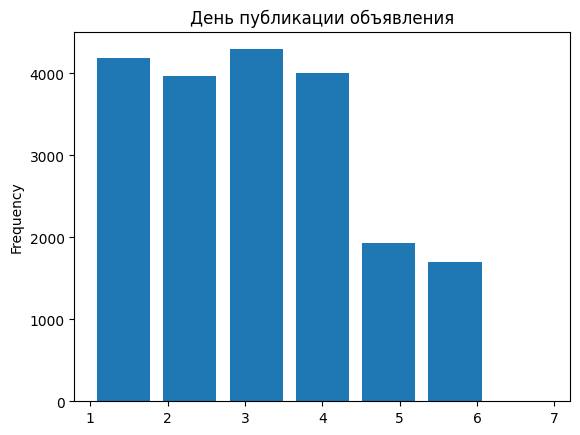

In [86]:
# День публикации объявления:
data.plot(
    kind='hist',
    y='day_exposition',
    title='День публикации объявления',
    bins= 7,
    range=(1, 7),
    rwidth=0.8,
    legend=False)
plt.show()

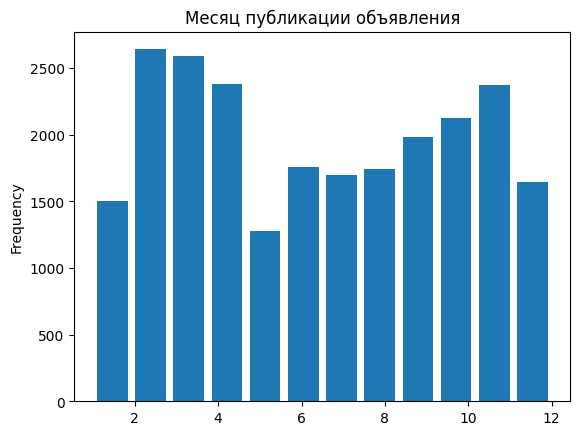

In [87]:
# Месяц публикации объявления:
data.plot(
    kind='hist',
    y='month_exposition',
    title='Месяц публикации объявления',
    bins= 12,
    range=(1, 12),
    rwidth=0.8,
    legend=False)
plt.show()

**Выводы по времени публикации:**
- Чаще всего объявления размещали в середине недели и в понедельник
- В воскресенье объявления не публиковались вообще
- Пик публикации объявлений приходится на февраль и март
- Меньше всего объявлений размещается в мае и в летние месяцы

### Изучим, как быстро продавались квартиры:

In [88]:
# Выясним медиану и средний срок продажи:
data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

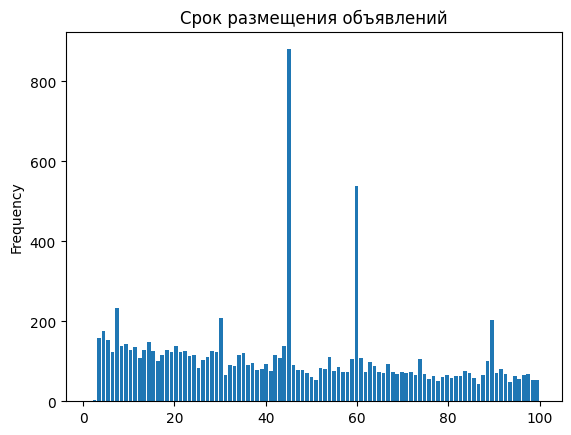

In [89]:
# Построим гистограмму, чтобы увидеть сколько дней занимает продажа квартир:
data.plot(
    kind='hist',
    y='days_exposition',
    title='Срок размещения объявлений',
    bins= 100,
    range=(1, 100),
    rwidth=0.8,
    legend=False)
plt.show()

На графике видим явные пики значений на 45 и 60 днях размещения.  
Данное обстоятельство, скорее всего, связано с правилами размещения объявлений на сервисе Яндекс.Недвижимость.  

Согласно правилам, **сроки бесплатного размещения** о продаже квартир стоимостью до 4,5 млн.руб. составляют **45 дней**, до 10 млн.руб. - **60 дней.**  
Это и объясняет рассматриваемые пики: большинство продавцов не хотят платить деньги за размещение своих объявлений.  

Проверим гипотезу на практике: выведем наиболее часто встречающееся значение в столбце *days_exposition:*

In [90]:
# Посчитаем наиболее часто встречающееся значения методом value_counts():
data['days_exposition'].value_counts().head()

45.0    880
60.0    538
7.0     234
30.0    208
90.0    204
Name: days_exposition, dtype: int64

**Вывод:** Гипотеза подтвердилась. Пики в 45 и 60 дней обусловлены сроками бесплатного размещения объявлений на сервисе Яндекс.Недвижимость. 

In [91]:
# Ознакомимся с качественными характеристиками стоблца с помощью метода describe():
data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

#### Вывод: 
Продажа квартиры обычно занимает от 3х до 6 месяцев: диапазон между медианой (95 дней) и средним значением (180 дней).  
Быстрыми продажами можно считать сделки, которые закрыли за 45 дней и меньше (первый квартиль данных), а необычно долгими - те, что продавались более 232 дней (последний квартиль данных).

### Какие факторы больше всего влияют на общую (полную) стоимость объекта?

#### Изучим, зависит ли цена от:
- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год).  


Для этого построим графики, которые покажут зависимость цены от указанных выше параметров:

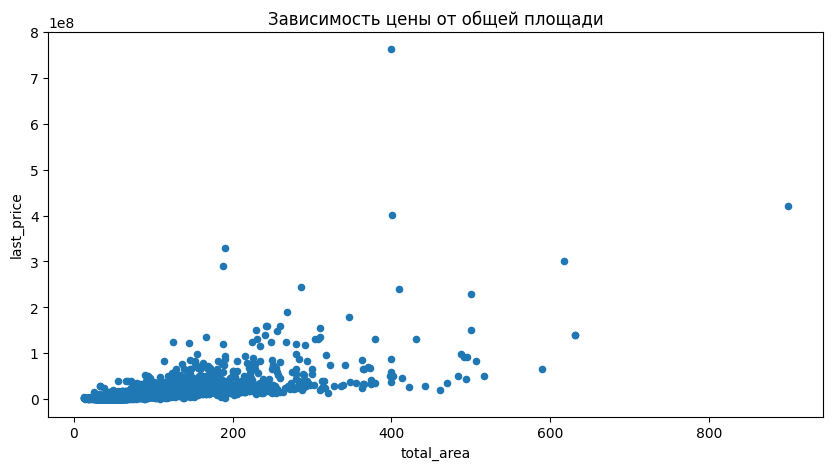

In [92]:
# Зависимость цены от общей площади:
data.plot(kind='scatter',x='total_area', y='last_price', figsize=(10,5), title='Зависимость цены от общей площади')
plt.show()

In [93]:
# Также посчитаем коэффициент кореляции между ценой и общей площадью квартир:
round(data['total_area'].corr(data['last_price']), 2)

0.65

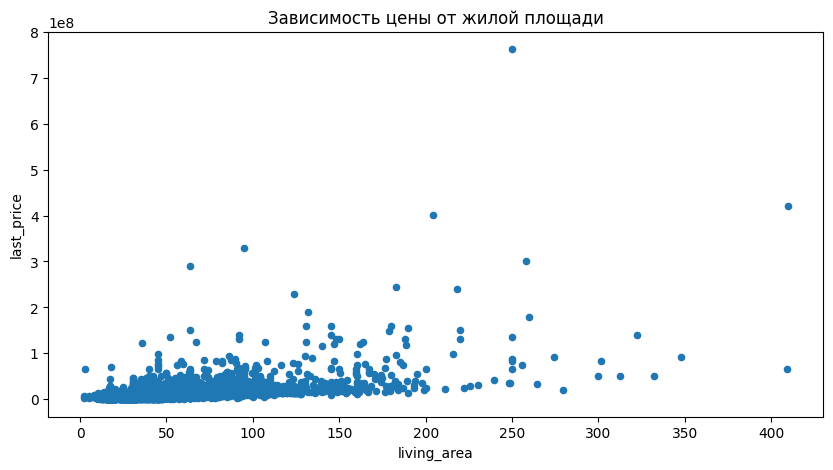

In [94]:
# Зависимость цены от жилой площади:
data.plot(kind='scatter', x='living_area', y='last_price', figsize=(10,5), title='Зависимость цены от жилой площади')
plt.show() 

In [95]:
# Также посчитаем коэффициент кореляции между ценой и жилой площадью квартир:
round(data['living_area'].corr(data['last_price']), 2)

0.56

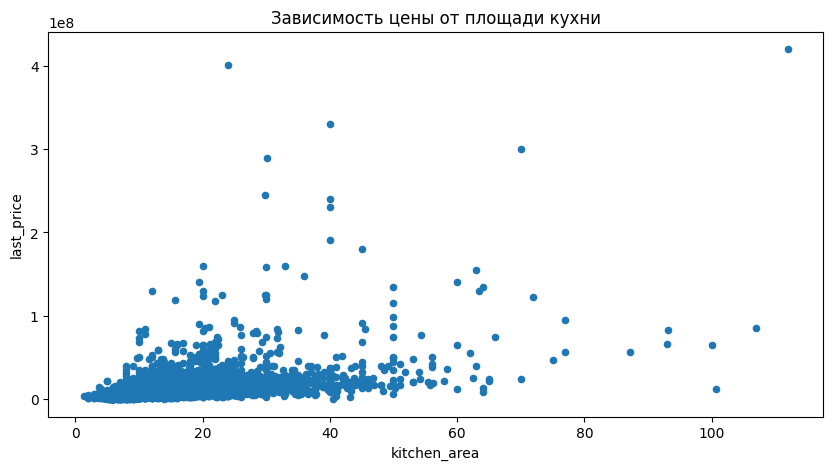

In [96]:
# Зависимость цены от площади кухни:
data.plot(kind='scatter', x='kitchen_area', y='last_price', figsize=(10,5), title='Зависимость цены от площади кухни')
plt.show()

In [97]:
# Также посчитаем коэффициент кореляции между ценой и площадью кухни:
round(data['kitchen_area'].corr(data['last_price']), 2)

0.52

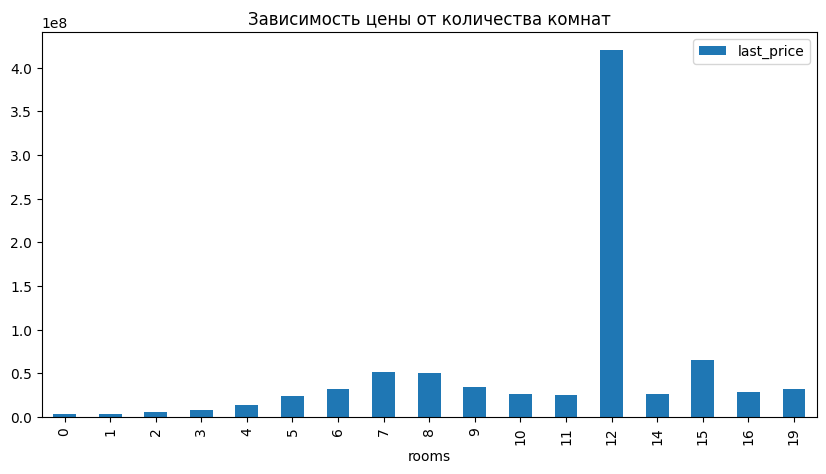

In [98]:
# Зависимость цены от количества комнат:
data.pivot_table(index='rooms', values='last_price').plot(figsize=(10,5), kind='bar', title='Зависимость цены от количества комнат')
plt.show()

In [99]:
# Также посчитаем коэффициент кореляции между ценой и количеством комнат:
round(data['rooms'].corr(data['last_price']), 2)

0.36

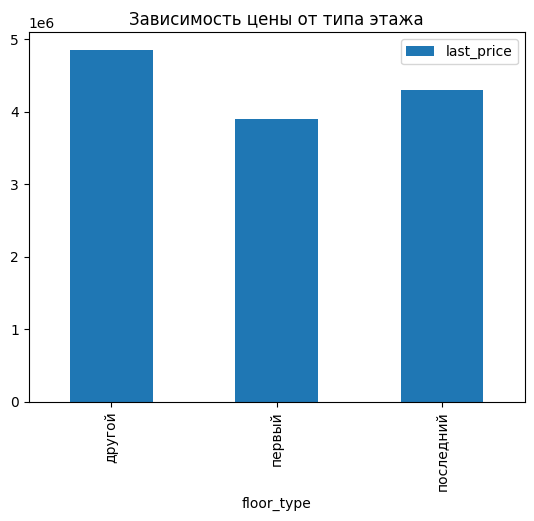

In [100]:
# Зависимость цены от этажа, на котором расположена квартира (первый, последний, другой):
data.pivot_table(index='floor_type', values='last_price', aggfunc='median').plot(kind='bar', title='Зависимость цены от типа этажа')
plt.show()

**Вывод:** Квартиры на первом и последнем этажах являются самыми доступными по стоимости.  
Это может быть связано с тем, что традиционно, они считаются самыми неудобными для жизни, что непосредственно отражается на их стоимости.

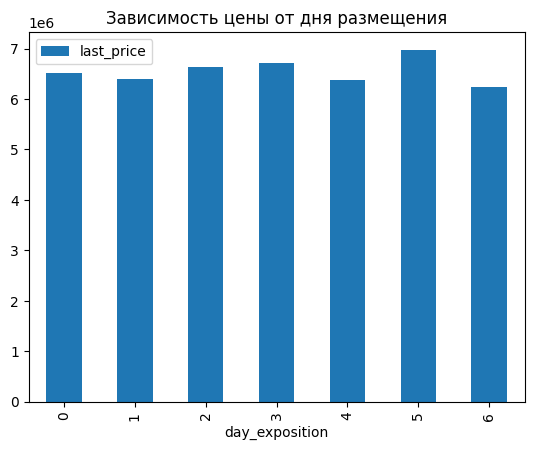

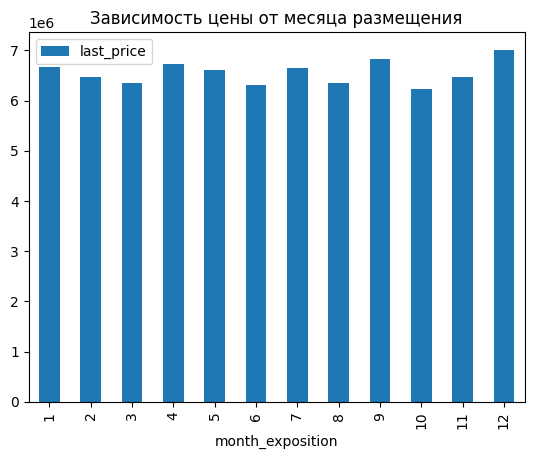

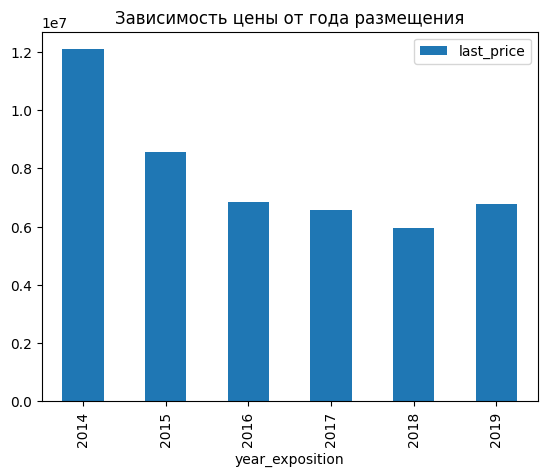

In [101]:
# Зависимость цены от даты размещения (день недели, месяц, год):
data.pivot_table(index='day_exposition', values='last_price').plot(kind='bar', title='Зависимость цены от дня размещения')
plt.show()
data.pivot_table(index='month_exposition', values='last_price').plot(kind='bar', title='Зависимость цены от месяца размещения')
plt.show()
data.pivot_table(index='year_exposition', values='last_price').plot(kind='bar', title='Зависимость цены от года размещения')
plt.show()

In [102]:
# Также посчитаем коэффициент кореляции между ценой и днём, месяцем и годом размещения объявления:
print(f"Кореляция цены и дня размещения: {round(data['day_exposition'].corr(data['last_price']), 4)}")
print(f"Кореляция цены и месяца размещения: {round(data['month_exposition'].corr(data['last_price']), 4)}")
print(f"Кореляция цены и года размещения: {round(data['year_exposition'].corr(data['last_price']), 4)}")

Кореляция цены и дня размещения: 0.0016
Кореляция цены и месяца размещения: 0.0028
Кореляция цены и года размещения: -0.0431


**Вывод**: Изучив факторы, потенциально влияющие на стоимость квартиры, можно сделать следующие выводы:
- Общая и жилая площади ***влияют*** на стоимость квартиры: чем больше эти показатели, тем дороже квартира. Больше всего зависимость прослеживается на квартирах от 200 кв.м.
- Площадь кухни ***слабо, но влияет*** на стоимость квартиры. Больше всего зависимость прослеживается на площади от 40 кв.м.
- Количество комнат по сравнению с другими факторами ***незначительно*** влияет на стоимость квартиры
- Квартиры, расположенные на первом этаже, являются ***самыми доступными*** по стоимости по сравнению с другими этажами
- Квартиры, расположенные на последнем этаже, являются ***самыми дорогими*** по сравнению с другими этажами
- Дата размещения (день недели, месяц, год) ***не влияет*** на стоимость квартир

### Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений:

In [103]:
# Определим среднюю цену одного кв.м. в населенных пунктах и количество объявлений:
top_locality = data.pivot_table(index='locality_name', values='price_per_square_meter', aggfunc=['count', 'median']).reset_index()
# Поменяем названия столбцов:
top_locality.columns = ['locality_name', 'ads_count', 'avg_price_sq_meter'] 
# Выведем 10 с наибольшим числом объявлений:
top_locality.sort_values(by='ads_count', ascending=False).head(10) 

,locality_name,ads_count,avg_price_sq_meter
312,санкт-петербург,15721,104761.900
234,поселок мурино,556,85878.465
302,поселок шушары,440,76876.175
4,всеволожск,398,65789.470
306,пушкин,369,100000.000
133,колпино,338,74723.745
241,поселок парголово,327,91642.860
7,гатчина,307,67796.610
57,деревня кудрово,299,91860.470
5,выборг,237,58158.320


#### Выделим населённые пункты с самой высокой и самой низкой средней стоимостью квадратного метра:

In [104]:
# Населенный пункт с самой высокой средней стоимостью квадратного метра:
top_locality.sort_values(by='avg_price_sq_meter', ascending=False).head(1)

,locality_name,ads_count,avg_price_sq_meter
312,санкт-петербург,15721,104761.9


In [105]:
# Населенный пункт с самой низкой средней стоимостью квадратного метра:
top_locality.sort_values(by='avg_price_sq_meter', ascending=False).tail(1)

,locality_name,ads_count,avg_price_sq_meter
104,деревня старополье,3,11000.0


**Вывод:** Изучив среднюю стоимость за квадратный метр по населенным пунктам, можно сделать следующие выводы:
- Лидером по совокупности количества объявлений и стоимости за кв.м. является Санкт-Петербург;
- Самая дешевая недвижимость расположена в Сланцевском районе Ленинградской области, в деревне Старополье

### Выделим квартиры в Санкт-Петербурге и вычислим среднюю цену каждого км. Проверим, как меняется стоимость объектов в зависимости от расстояния до центра города:

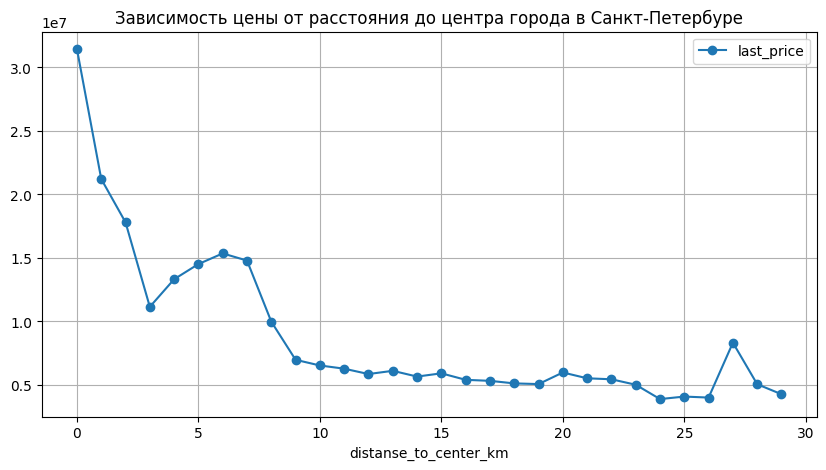

In [106]:
spb_pivot = data.query('locality_name == "санкт-петербург"').pivot_table(values='last_price',index='cityCenters_km', aggfunc=['count','mean']).reset_index()
spb_pivot.columns = ['distanse_to_center_km', 'count', 'last_price'] 
spb_pivot.plot(x='distanse_to_center_km', y='last_price', figsize=(10,5), grid=True, style='o-', title='Зависимость цены от расстояния до центра города в Санкт-Петербуре')
plt.show()

**Вывод**: Исходя из полученных данных и графика мы видим, что зависимость между ценой объекта и расстоянием до центра города прослеживается. Общая тенденция такова: чем **дальше** объект от центра города, тем **меньше** его стоимость.  

Тем не менее, она не является линейной, так как помимо удаленности от центра города есть много других факторов, влияющих на стоимость квартиры. 

### Общий вывод:

Исследование состояло из четырёх основных этапов:  

**1. Знакомство с данными:**
- Получена общая информацию о датафрейме
- Построены общие гистограммы для всех числовых столбцов таблицы
- Сформировано первое представление о полученных данных

**2. Предобработка данных:**
- Заполнены пропущенные значения в столбцах, где это возможно
- Указаны причины, которые могли привести к пропускам в данных
- Преобразованы типы данных в столбцах, где это необходимо
- Устранены неявные дубликаты в столбце с наименованиями населенных пунктов 
- Устранены редкие и выбивающиеся значения (аномалии и выбросы)
- Описаны особенности, присущие датасету

**3. Добавление новых параметров:**  

Добавлены новые столбцы со следующими параметрами:  
•	цена одного квадратного метра    
•	день недели публикации объявления    
•	месяц публикации объявления    
•	год публикации объявления    
•	тип этажа квартиры    
•	расстояние до центра города в километрах  

**4. Исследовательский анализ данных:**
- Построены гистограммы и описаны наблюдения по основным параметрам объекта (площади, стоимость, этажность, окружающая инфраструктура, время публикации объявления)
- Изучено, сколько времени обычно занимает продажа квартиры 
- Определены факторы, которые больше всего влияют на стоимость объекта
- Посчитана средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений
- Выделены населённые пункты с самой высокой и низкой стоимостью квадратного метра
- Изучено, как стоимость объектов зависит от расстояния до центра города для Санкт-Петербурга

В ходе исследования были обнаружены следующие особенности и зависимости, которые существуют на этом рынке недвижимости:
- Большая часть квартир имеет общую площадь от 30 до 50 квадратных метров
- Жилая площадь квартир колеблется в диапазоне 17-20 квадратных метров
- Площадь кухни в квартирах в среднем составляет от 6 до 10 квадратных метров
- Средняя цена объектов вне зависимости от других параметров составляет от 3 до 4 млн.руб
- Самые многочисленные объявления в базе - продажа -одно/двухкомнатых квартир
- Высота потолков в большинстве квартир составляет 2.6 метра
- Самые распространенные этажи квартир в объявлениях: с первого по пятый, самый популярный - второй
- Квартир на первом и последнем этажах сдается крайне мало, основную массу составляют другие этажи
- Большинство квартир расположены на расстоянии 10-15 км до центра города
- У большей части квартир парк расположен довольно близко, в пределах 500 метров
- Пик публикации объявлений приходится на февраль и март, меньше всего объявлений размещается в мае и в летние месяцы
- Срок продажи квартиры в Санкт-Петербурге и соседних населенных пунктах составляет в среднем 3-6 месяцев
- Факторами, потенциально влияющими на стоимость квартиры, являются: общая и жилая площади квартиры, площадь кухни, тип этажа и в меньшей степени количество комнат в квартире. Больше всего зависимость прослеживается на больших метражах и большом количестве комнат
- Лидером по совокупности количества объявлений и стоимости за кв.м. является Санкт-Петербург
- Самая дешевая недвижимость расположена в Сланцевском районе Ленинградской области, в деревне Старополье
- В Санкт-Петербурге существует зависимость между ценой объекта и расстоянием до центра города: чем дальше объект от центра города, тем меньше его стоимость